In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras.datasets import fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
from data_augmentation import data_augmentation
from metrics import plot_ROC_curve, plot_confusion_matrix
from models import create_mlp_model, plot_accuracy, plot_loss
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Sparse arrays

In [5]:
y_sparse_train = np.zeros([len(y_train),10])
y_sparse_test = np.zeros([len(y_test),10])

In [6]:
for idx in range(len(y_train)):
    y_sparse_train[idx,y_train[idx]] = 1

for idx in range(len(y_test)):
    y_sparse_test[idx,y_test[idx]] = 1

## Models

In [7]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam
from keras.models import Sequential
from keras.utils import plot_model
from keras.initializers import GlorotUniform, GlorotNormal, RandomNormal
from keras.backend import clear_session

### Softmax Regression

In [8]:
model_mlp = Sequential()

In [9]:
model_mlp.add(Flatten(input_shape=(28,28)))

In [10]:
model_mlp.add(BatchNormalization())

In [11]:
model_mlp.add(Dense(256, activation="relu", kernel_initializer=RandomNormal(0,0.001)))

In [12]:
model_mlp.add(Dropout(0.125))

In [13]:
model_mlp.add(Dense(128, activation="relu", kernel_initializer=RandomNormal(0,0.001)))

In [14]:
model_mlp.add(Dense(10, activation="softmax"))

In [15]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

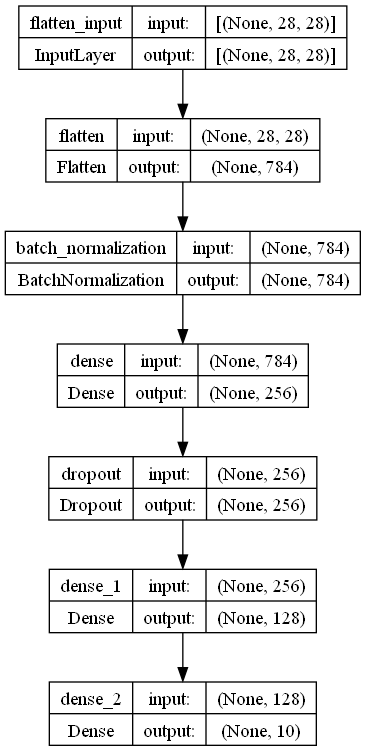

In [16]:
plot_model(model_mlp, show_shapes=True, show_layer_names=True, to_file='mlp_model.png')

In [17]:
model_mlp.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

### Train

In [18]:
history_mlp = model_mlp.fit(x=X_train, y=y_sparse_train, validation_data=(X_test, y_sparse_test), batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4944 - accuracy: 0.8209 - val_loss: 0.4099 - val_accuracy: 0.8484
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8681 - val_loss: 0.3541 - val_accuracy: 0.8722
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3190 - accuracy: 0.8817 - val_loss: 0.3477 - val_accuracy: 0.8766
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.8917 - val_loss: 0.3508 - val_accuracy: 0.8744
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.8986 - val_loss: 0.3307 - val_accuracy: 0.8828
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2542 - accuracy: 0.9049 - val_loss: 0.3279 - val_accuracy: 0.8828
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2416 - accuracy: 0.9090 - val_loss: 0.3198 - val_accuracy: 0.8868
Epoch 

### Metrics

313/313 [==============================] - 0s 827us/step
Softmax Regression:
  Accuracy: 0.8960000276565552
  Loss: 0.36930322647094727
  ROC AUC: 0.9918626555555555
  F1-score (macro): 0.895702842266522
  F1-score (micro): 0.8960000000000001
  Precision: 0.896075034907829
  Recall: 0.8960000000000001


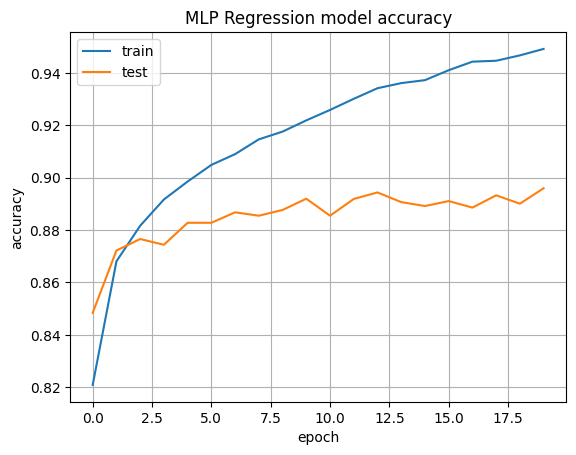

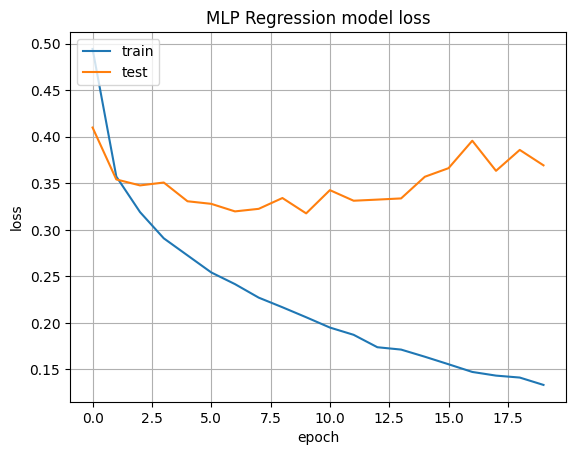

In [19]:
# Softmax Regression evaluation
y_pred_mlp = model_mlp.predict(X_test)
roc_auc_mlp = roc_auc_score(y_sparse_test, y_pred_mlp, multi_class='ovr', average='macro')
f1_macro_mlp = f1_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='macro')
f1_micro_mlp = f1_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='micro')
precision_mlp = precision_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='macro')
recall_mlp = recall_score(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1), average='macro')

# Print the evaluation metrics
print("Softmax Regression:")
print("  Accuracy:", history_mlp.history['val_accuracy'][-1])
print("  Loss:", history_mlp.history['val_loss'][-1])
print("  ROC AUC:", roc_auc_mlp)
print("  F1-score (macro):", f1_macro_mlp)
print("  F1-score (micro):", f1_micro_mlp)
print("  Precision:", precision_mlp)
print("  Recall:", recall_mlp)

# Plot the learning curves
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('MLP Regression model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('MLP Regression model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

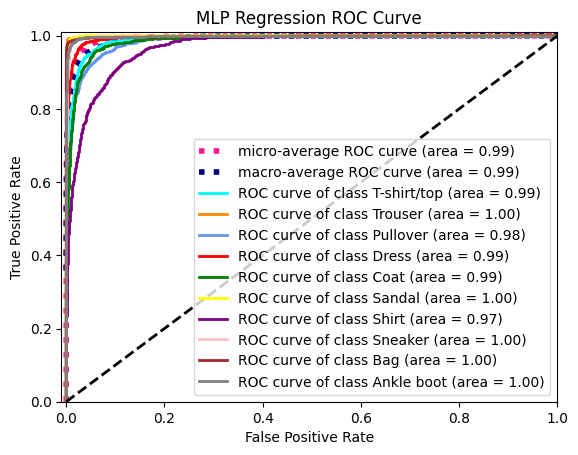

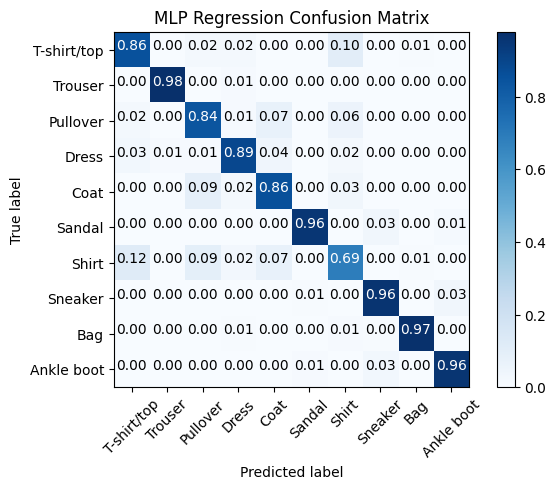

In [20]:
plot_ROC_curve(y_sparse_test, y_pred_mlp, class_names, title='MLP Regression ROC Curve')
cnf_matrix = confusion_matrix(y_sparse_test.argmax(axis=1), y_pred_mlp.argmax(axis=1))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='MLP Regression Confusion Matrix')

In [21]:
clear_session()

#### Learning Rate

c:\Users\Matias\.conda\envs\tf\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


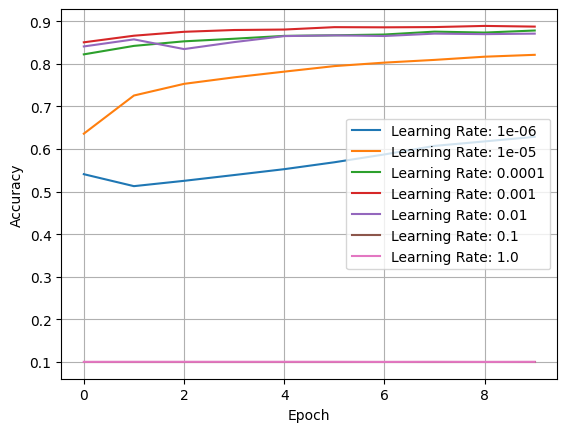

In [22]:
# Vary the learning rate hyperparameter
learning_rates = np.logspace(-6, 0, 7)
accuracies_lr = []
losses_lr = []

for lr in learning_rates:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=lr, 
                                   batch_size=128,
                                   activation='relu', 
                                   optimizer=Adam, 
                                   dropout_rate=0.125, 
                                   batch_normalization=True, 
                                   weight_initialization=RandomNormal(0,0.001))
    plt.plot(history.history['val_accuracy'], label=f'Learning Rate: {lr}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_lr.append(accuracy)
    losses_lr.append(loss)
    clear_session()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

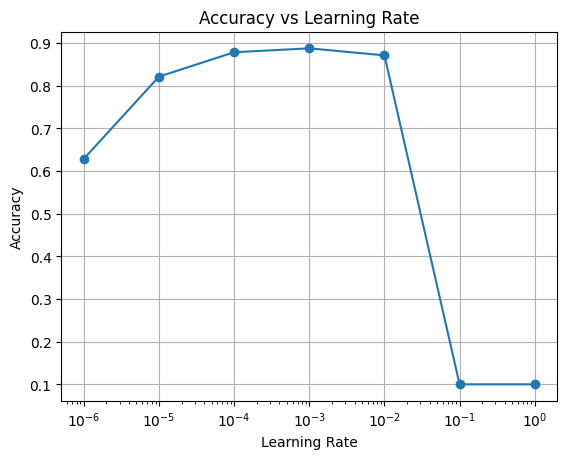

Max accuracy: 0.887499988079071 at lr = 0.001


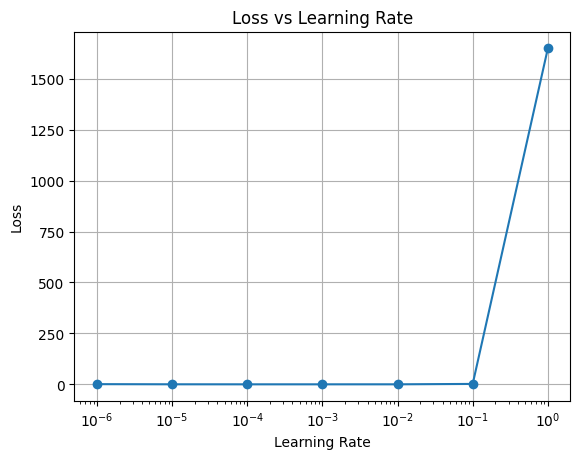

Min loss: 0.33207422494888306 at lr = 0.001


In [23]:
# Plot the accuracy against learning rate
plot_accuracy(learning_rates, accuracies_lr, 'Learning Rate', log_scale=True)
# Print max accuracy @ learning
print("Max accuracy:", np.max(accuracies_lr), "at lr =", learning_rates[np.argmax(accuracies_lr)])
# Plot the loss against learning rate
plot_loss(learning_rates, losses_lr, 'Learning Rate', log_scale=True)
# Print min loss @ learning
print("Min loss:", np.min(losses_lr), "at lr =", learning_rates[np.argmin(losses_lr)])

#### Batch Size 

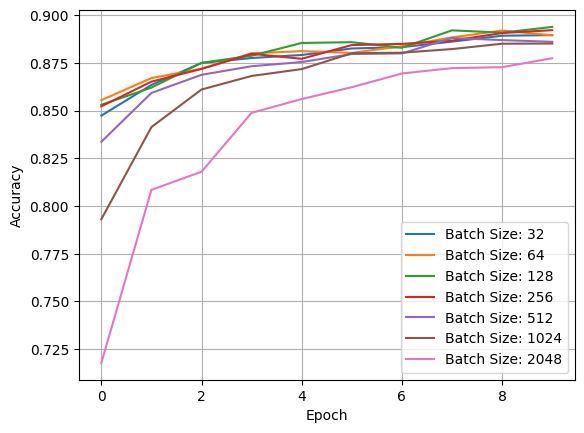

In [24]:
# Vary the batch size hyperparameter
batch_sizes = [32, 64, 128, 256, 512, 1024, 2048]
accuracies_bs = []
losses_bs = []

for bs in batch_sizes:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=1e-3, 
                                   batch_size=bs,
                                   activation='relu', 
                                   optimizer=Adam, 
                                   dropout_rate=0.125, 
                                   batch_normalization=True, 
                                   weight_initialization=RandomNormal(0,0.001))
    plt.plot(history.history['val_accuracy'], label=f'Batch Size: {bs}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_bs.append(accuracy)
    losses_bs.append(loss)
    clear_session()
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

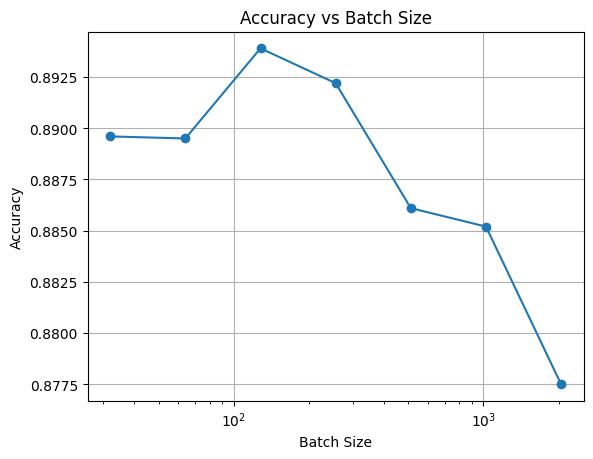

Max accuracy: 0.8938999772071838 at batch size = 128


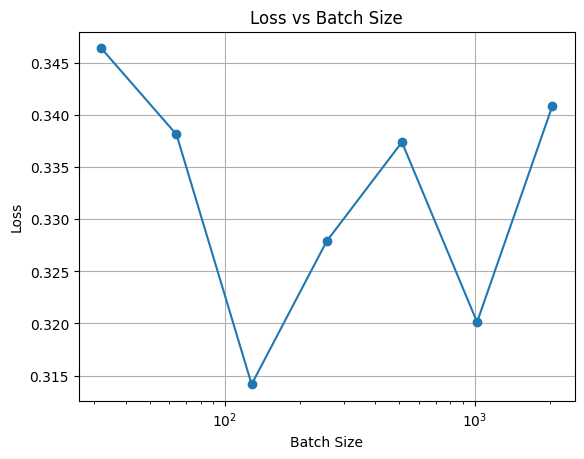

Min loss: 0.3141655921936035 at batch size = 128


In [25]:
# Plot the accuracy against batch size
plot_accuracy(batch_sizes, accuracies_bs, 'Batch Size', log_scale=True)
# Print max accuracy @ batch size
print("Max accuracy:", np.max(accuracies_bs), "at batch size =", batch_sizes[np.argmax(accuracies_bs)])
# Plot the loss against batch size
plot_loss(batch_sizes, losses_bs, 'Batch Size', log_scale=True)
# Print min loss @ batch size
print("Min loss:", np.min(losses_bs), "at batch size =", batch_sizes[np.argmin(losses_bs)])

#### Activations

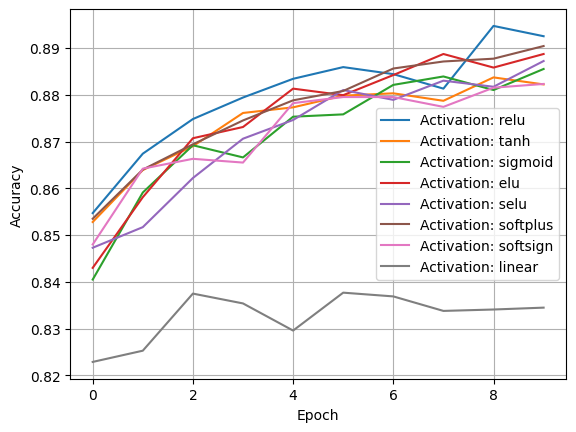

In [26]:
# Vary the optimizer hyperparameter
activations = ['relu', 'tanh', 'sigmoid', 'elu', 'selu', 'softplus', 'softsign', 'linear']
accuracies_act = []
losses_act = []

for act in activations:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=1e-3, 
                                   batch_size=128,
                                   activation=act, 
                                   optimizer=Adam, 
                                   dropout_rate=0.125, 
                                   batch_normalization=True, 
                                   weight_initialization=RandomNormal(0,0.001))
    plt.plot(history.history['val_accuracy'], label=f'Activation: {act}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_act.append(accuracy)
    losses_act.append(loss)
    clear_session()
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

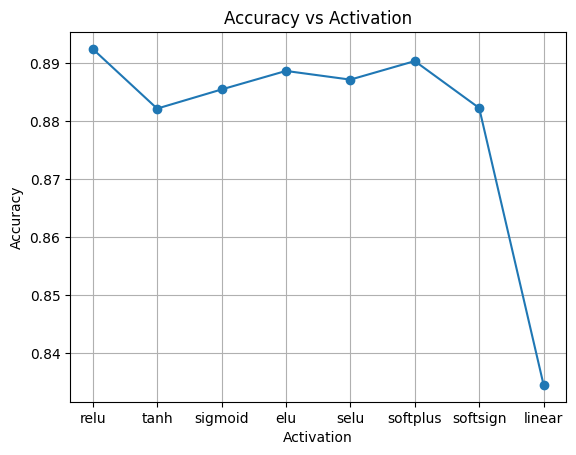

Max accuracy: 0.8924999833106995 at activation = relu


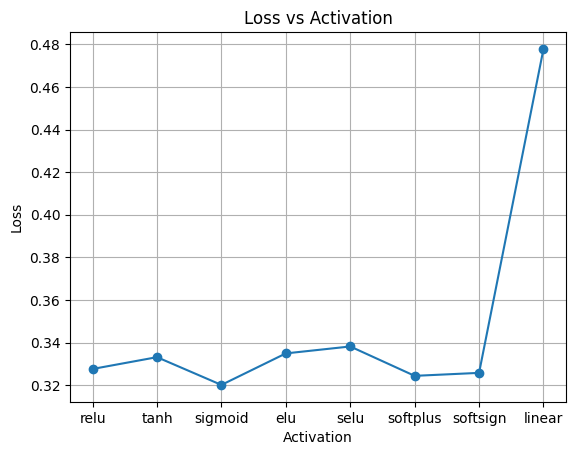

Min loss: 0.32008928060531616 at activation = sigmoid


In [27]:
# Plot the accuracy against activation
plot_accuracy(activations, accuracies_act, 'Activation')
# Print max accuracy @ activation
print("Max accuracy:", np.max(accuracies_act), "at activation =", activations[np.argmax(accuracies_act)])
# Plot the loss against activation
plot_loss(activations, losses_act, 'Activation')
# Print min loss @ activation
print("Min loss:", np.min(losses_act), "at activation =", activations[np.argmin(losses_act)])

#### Optimizers

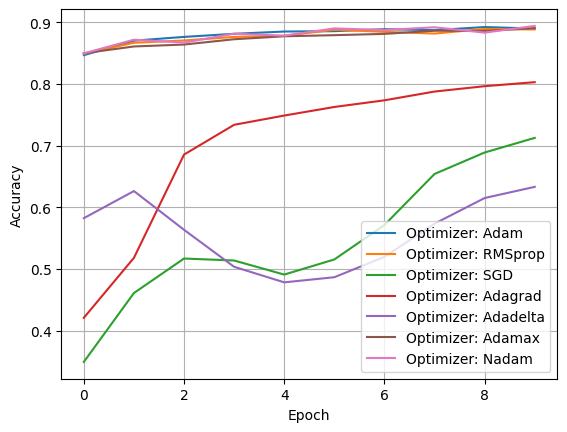

In [28]:
# Vary the optimizer hyperparameter
optimizers = [Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam]
accuracies_opt = []
losses_opt = []

for optimizer in optimizers:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=1e-3, 
                                   batch_size=128,
                                   activation='relu', 
                                   optimizer=optimizer, 
                                   dropout_rate=0.125, 
                                   batch_normalization=True, 
                                   weight_initialization=RandomNormal(0,0.001))
    plt.plot(history.history['val_accuracy'], label=f'Optimizer: {optimizer.__name__}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_opt.append(accuracy)
    losses_opt.append(loss)
    clear_session()
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

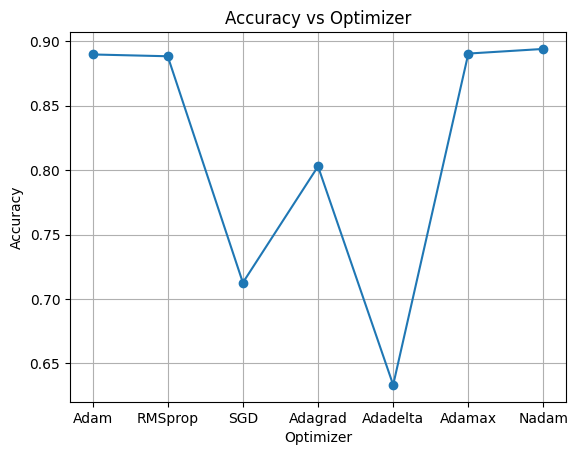

Max accuracy: 0.89410001039505 at optimizer = Nadam


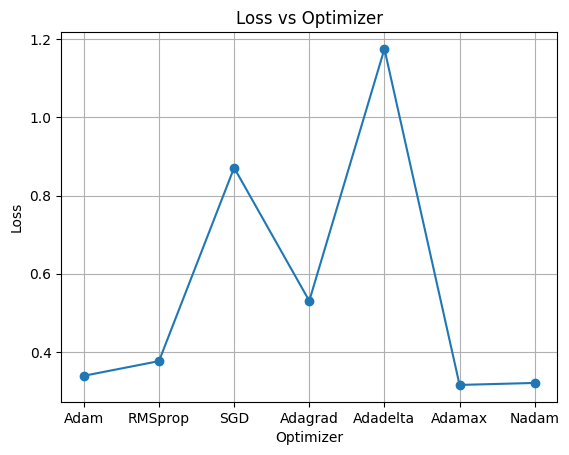

Min loss: 0.3154473900794983 at optimizer = Adamax


In [29]:
# Plot the accuracy against optimizer
optimizer_names = [opt.__name__ for opt in optimizers]
plot_accuracy(optimizer_names, accuracies_opt, 'Optimizer')
# Print max accuracy @ optimizer
print("Max accuracy:", np.max(accuracies_opt), "at optimizer =", optimizer_names[np.argmax(accuracies_opt)])
# Plot the loss against optimizer
plot_loss(optimizer_names, losses_opt, 'Optimizer')
# Print min loss @ optimizer
print("Min loss:", np.min(losses_opt), "at optimizer =", optimizer_names[np.argmin(losses_opt)])

#### Dropout Rate 

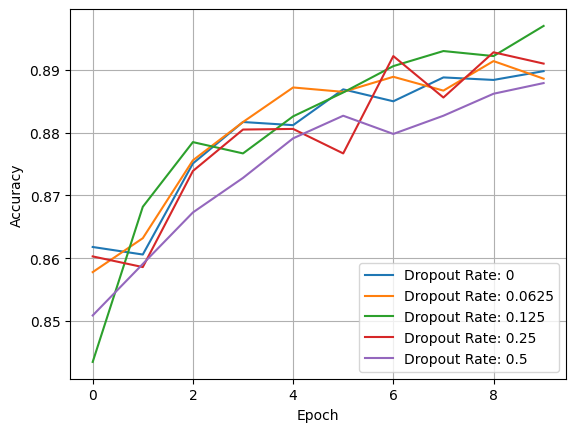

In [30]:
# Vary the dropout rate hyperparameter
dropout_rates = [0, 0.0625, 0.125, 0.25, 0.5]
accuracies_do = []
losses_do = []

for dr in dropout_rates:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=1e-3, 
                                   batch_size=128,
                                   activation='relu', 
                                   optimizer=Adam, 
                                   dropout_rate=dr,
                                   batch_normalization=True, 
                                   weight_initialization=RandomNormal(0,0.001))
    plt.plot(history.history['val_accuracy'], label=f'Dropout Rate: {dr}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_do.append(accuracy)
    losses_do.append(loss)
    clear_session()
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

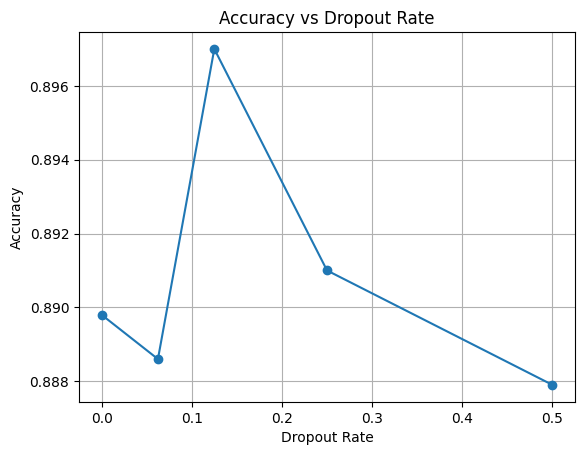

Max accuracy: 0.8970000147819519 at dropout rate = 0.125


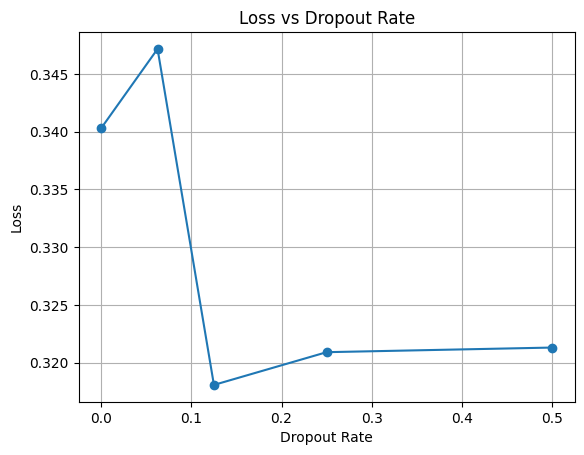

Min loss: 0.31807082891464233 at dropout rate = 0.125


In [31]:
# Plot the accuracy against dropout rate
plot_accuracy(dropout_rates, accuracies_do, 'Dropout Rate')
# Print max accuracy @ dropout rate
print("Max accuracy:", np.max(accuracies_do), "at dropout rate =", dropout_rates[np.argmax(accuracies_do)])
# Plot the loss against dropout rate
plot_loss(dropout_rates, losses_do, 'Dropout Rate')
# Print min loss @ dropout rate
print("Min loss:", np.min(losses_do), "at dropout rate =", dropout_rates[np.argmin(losses_do)])

#### Batch Normalization

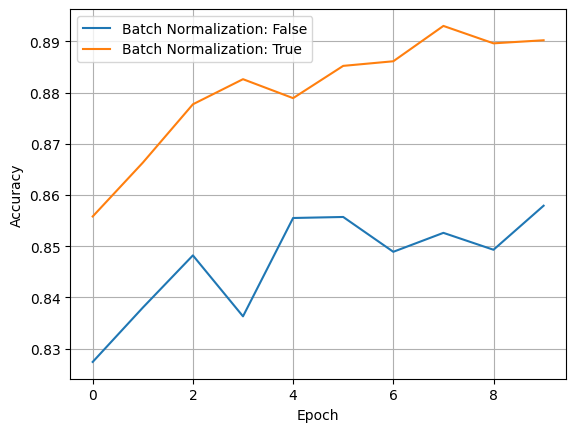

In [32]:
# Vary the batch normalization hyperparameter
batch_norms = [False, True]
accuracies_bn = []
losses_bn = []

for bn in batch_norms:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=1e-3, 
                                   batch_size=128,
                                   activation='relu', 
                                   optimizer=Adam, 
                                   dropout_rate=0.125, 
                                   batch_normalization=bn, 
                                   weight_initialization=RandomNormal(0,0.001))
    plt.plot(history.history['val_accuracy'], label=f'Batch Normalization: {bn}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_bn.append(accuracy)
    losses_bn.append(loss)
    clear_session()
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

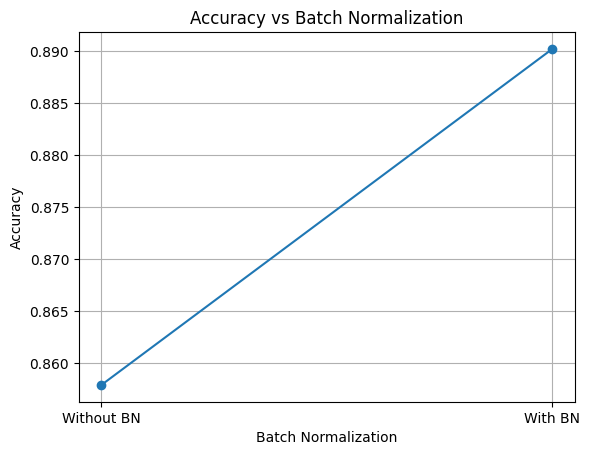

Max accuracy: 0.8902000188827515 at batch normalization = With BN


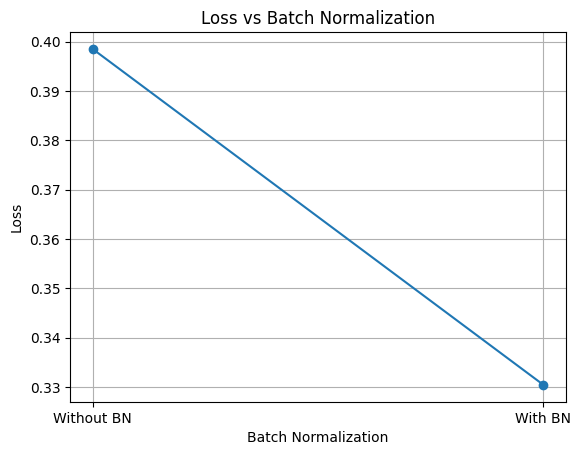

Min loss: 0.33045223355293274 at batch normalization = With BN


In [33]:
# Plot the accuracy against batch normalization
batch_norm_labels = ['Without BN', 'With BN']
plot_accuracy(batch_norm_labels, accuracies_bn, 'Batch Normalization')
# Print max accuracy @ batch normalization
print("Max accuracy:", np.max(accuracies_bn), "at batch normalization =", batch_norm_labels[np.argmax(accuracies_bn)])
# Plot the loss against batch normalization
plot_loss(batch_norm_labels, losses_bn, 'Batch Normalization')
# Print min loss @ batch normalization
print("Min loss:", np.min(losses_bn), "at batch normalization =", batch_norm_labels[np.argmin(losses_bn)])

#### Weigth Initialization

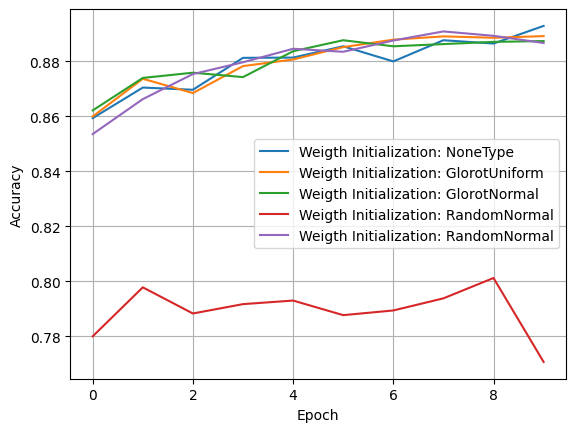

In [34]:
# Vary the weight initialization hyperparameter
weight_inits = [None, GlorotUniform(seed=42), GlorotNormal(seed=42), RandomNormal(0,1), RandomNormal(0,0.001)]
accuracies_wi = []
losses_wi = []

for wi in weight_inits:
    history = create_mlp_model(X_train, y_sparse_train, X_test, y_sparse_test, 
                                   learning_rate=1e-3, 
                                   batch_size=128,
                                   activation='relu', 
                                   optimizer=Adam, 
                                   dropout_rate=0.125, 
                                   batch_normalization=True, 
                                   weight_initialization=wi)
    plt.plot(history.history['val_accuracy'], label=f'Weigth Initialization: {wi.__class__.__name__}')
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    accuracies_wi.append(accuracy)
    losses_wi.append(loss)
    clear_session()
    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

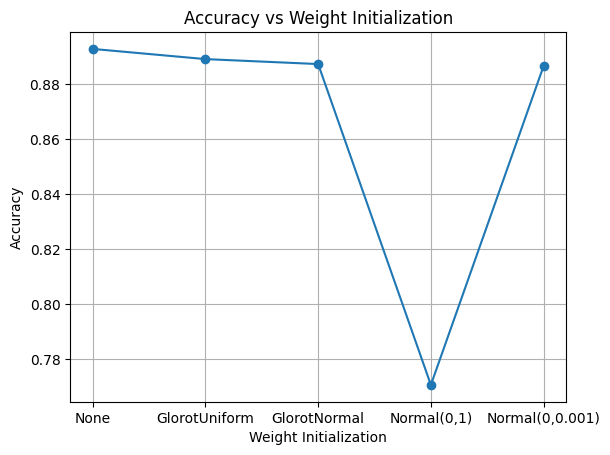

Max accuracy: 0.892799973487854 at weight initialization = None


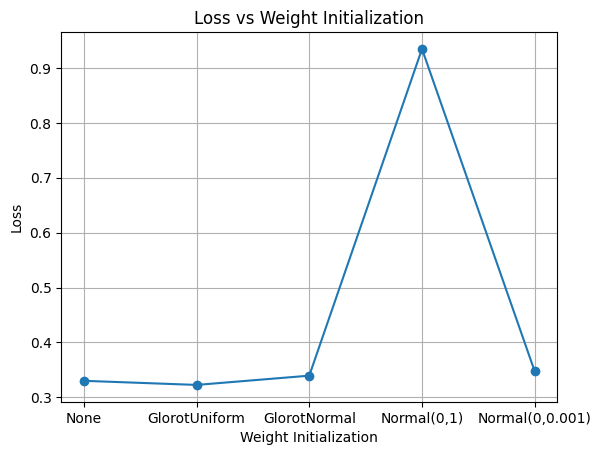

Min loss: 0.3224617540836334 at weight initialization = GlorotUniform


In [35]:
weight_init_labels = ['None', 'GlorotUniform', 'GlorotNormal', 'Normal(0,1)', 'Normal(0,0.001)']
# Plot the accuracy against weight initialization
plot_accuracy(weight_init_labels, accuracies_wi, 'Weight Initialization')
# Print max accuracy @ weight initialization
print("Max accuracy:", np.max(accuracies_wi), "at weight initialization =", weight_init_labels[np.argmax(accuracies_wi)])
# Plot the loss against weight initialization
plot_loss(weight_init_labels, losses_wi, 'Weight Initialization')
# Print min loss @ weight initialization
print("Min loss:", np.min(losses_wi), "at weight initialization =", weight_init_labels[np.argmin(losses_wi)])